# G&I Data Anaysis

학습활동. G&I 관련 웹스크래핑 코드 작성하기
G&I 사이트에서 텍스트(html)를 받아 코퍼스로 만들고, nltk의 여러 메소드를 사용하여, 다양한 분석을 하는 코드를 작성하자: 

- G&I 논문 페이지 혹은 G&I 연도별 아카이브 에서 2012년 이후 html 파일을 다운 받아야 함
 (2012년 이전 PDF로만 된 논문은 분석할 필요가 없으므로, 
첨부파일 학생답안의 PDF 파일 다운 받아 변환하는 코드는 참고용으로만 사용 할 것)

- 먼저, G&I의 연도별 URL 주소 패턴을 관찰할 것. (2012년 이후의 연도별 URL 주소 패턴이 두가지임에 유의할 것.)
- ipynb 파일 및 html 파일을 제출하세요. 보고서는 따로 제출하지 말고, 코드 중간중간에 직접 간단한 코멘트를 삽입해 주세요

# 1. 먼저, G&I의 연도별 URL 주소 패턴을 관찰

In [1]:
from urllib import request

url = "https://genominfo.org/journal/view.php?number=59"
response = request.urlopen(url)
raw = response.read().decode('utf8')

url2 = "https://genominfo.org/journal/view.php?number=504"
response2 = request.urlopen(url2)
raw2 = response2.read().decode('utf8')

In [2]:
type(raw)

str

In [3]:
raw[500:10000]

'w3.org/1999/xhtml" lang="eng" xml:lang="eng" xmlns:mml="http://www.w3.org/1998/Math/MathML"><!--<![endif]-->\n<head>\n<title>ENCODE: A Sourcebook of Epigenomes and Chromatin Language</title>\n<meta name="google-site-verification" content="O4X6cexwvLDJMG4ClUtrIv9GS-_VncjbqTyLACKzpBo" />\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name= "format-detection" content = "telephone=no">\n<meta name="citation_journal_title" content="Genomics &amp; Informatics"/>\n<meta name="citation_title" content="ENCODE: A Sourcebook of Epigenomes and Chromatin Language"/>\n<link rel="stylesheet" href="/flowplayer/skin/minimalist.css">\n<script src="https://code.jquery.com/jquery-1.11.0.js"></script>\n<script src="/flowplayer/flowplayer.min.js"></script>\n<link rel="shortcut icon" href="/image/icon/favicon.ico">\n<link type="text/css" rel="stylesheet" href="/css/common_v1.1.css" />\n<link type="text/css" rel="stylesheet" href="/css/style.css?1667038459" />\n<script type="te

In [4]:
raw2[0:10000]

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<!--[if IE 7]><html xmlns="http://www.w3.org/1999/xhtml" lang="eng" xml:lang="eng" class="ie7"><![endif]-->\n<!--[if IE 8]><html xmlns="http://www.w3.org/1999/xhtml" lang="eng" xml:lang="eng" class="ie8"><![endif]-->\n<!--[if IE 9]><html xmlns="http://www.w3.org/1999/xhtml" lang="eng" xml:lang="eng" class="ie9"><![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--><html xmlns="http://www.w3.org/1999/xhtml" lang="eng" xml:lang="eng" xmlns:mml="http://www.w3.org/1998/Math/MathML"><!--<![endif]-->\n<head>\n<title>System-Wide Expression and Function of Olfactory Receptors in Mammals</title>\n<meta name="google-site-verification" content="O4X6cexwvLDJMG4ClUtrIv9GS-_VncjbqTyLACKzpBo" />\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name= "format-detection" content = "telephone=no">\n<meta name="citation_journal_title" content="Genomics &amp; Inform

In [5]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(raw, 'html.parser').get_text()

In [6]:
raw[:200]

'\n\n\n\n\n\nENCODE: A Sourcebook of Epigenomes and Chromatin Language\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHome\nE-Submission\nSitemap\nContact Us\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHOME'

# 2. G&I 논문지 연도별 패턴 파악 (html 받기)

In [8]:
from urllib import request
from bs4 import BeautifulSoup

for i in range(42,220):
    try:
        url = "https://genominfo.org/journal/view.php?number=" + str(i)
        print("https://genominfo.org/journal/view.php?number=" + str(i))
        response = request.urlopen(url)
        raw = response.read().decode('utf8')
        raw = BeautifulSoup(raw, 'html.parser').get_text()
        f = open("file" + str(i) + ".txt", 'w', encoding='UTF-8')
        f.write(raw)
        f.close()
    except UnicodeDecodeError:
        print("cannot process https://genominfo.org/journal/view.php?number=" + str(i))

for i in range(487,700):
    try:
        url = "https://genominfo.org/journal/view.php?number=" + str(i)
        print("https://genominfo.org/journal/view.php?number=" + str(i))
        response = request.urlopen(url)
        raw = response.read().decode('utf8')
        raw = BeautifulSoup(raw, 'html.parser').get_text()
        f = open("file" + str(i) + ".txt", 'w', encoding='UTF-8')
        f.write(raw)
        f.close()
    except UnicodeDecodeError:
        print("cannot process https://genominfo.org/journal/view.php?number=" + str(i))        

https://genominfo.org/journal/view.php?number=42
https://genominfo.org/journal/view.php?number=43
https://genominfo.org/journal/view.php?number=44
https://genominfo.org/journal/view.php?number=45
https://genominfo.org/journal/view.php?number=46
https://genominfo.org/journal/view.php?number=47
https://genominfo.org/journal/view.php?number=48
https://genominfo.org/journal/view.php?number=49
https://genominfo.org/journal/view.php?number=50
https://genominfo.org/journal/view.php?number=51
https://genominfo.org/journal/view.php?number=52
https://genominfo.org/journal/view.php?number=53
https://genominfo.org/journal/view.php?number=54
https://genominfo.org/journal/view.php?number=55
https://genominfo.org/journal/view.php?number=56
https://genominfo.org/journal/view.php?number=57
https://genominfo.org/journal/view.php?number=58
https://genominfo.org/journal/view.php?number=59
https://genominfo.org/journal/view.php?number=60
https://genominfo.org/journal/view.php?number=61
https://genominfo.or

https://genominfo.org/journal/view.php?number=208
https://genominfo.org/journal/view.php?number=209
https://genominfo.org/journal/view.php?number=210
https://genominfo.org/journal/view.php?number=211
https://genominfo.org/journal/view.php?number=212
https://genominfo.org/journal/view.php?number=213
https://genominfo.org/journal/view.php?number=214
https://genominfo.org/journal/view.php?number=215
https://genominfo.org/journal/view.php?number=216
https://genominfo.org/journal/view.php?number=217
https://genominfo.org/journal/view.php?number=218
https://genominfo.org/journal/view.php?number=219
https://genominfo.org/journal/view.php?number=487
https://genominfo.org/journal/view.php?number=488
https://genominfo.org/journal/view.php?number=489
https://genominfo.org/journal/view.php?number=490
https://genominfo.org/journal/view.php?number=491
https://genominfo.org/journal/view.php?number=492
https://genominfo.org/journal/view.php?number=493
https://genominfo.org/journal/view.php?number=494


https://genominfo.org/journal/view.php?number=639
https://genominfo.org/journal/view.php?number=640
https://genominfo.org/journal/view.php?number=641
https://genominfo.org/journal/view.php?number=642
https://genominfo.org/journal/view.php?number=643
https://genominfo.org/journal/view.php?number=644
https://genominfo.org/journal/view.php?number=645
https://genominfo.org/journal/view.php?number=646
https://genominfo.org/journal/view.php?number=647
https://genominfo.org/journal/view.php?number=648
https://genominfo.org/journal/view.php?number=649
https://genominfo.org/journal/view.php?number=650
https://genominfo.org/journal/view.php?number=651
https://genominfo.org/journal/view.php?number=652
https://genominfo.org/journal/view.php?number=653
https://genominfo.org/journal/view.php?number=654
https://genominfo.org/journal/view.php?number=655
https://genominfo.org/journal/view.php?number=656
https://genominfo.org/journal/view.php?number=657
https://genominfo.org/journal/view.php?number=658


-2013년부터 2022년까지에 해당  
-url에 들어가는 숫자가 일정하게 커지다가 중간에 급격하게 큰 값으로 넘어가는 구간이 존재하기 때문에 크게 두가지 url 주소 패턴을 가진다고 판단했음.

# 3. nltk를 활용한 data 분석

In [1]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'C:/my_gi_corpora'
GNICorpus = PlaintextCorpusReader(corpus_root, '.*')
GNICorpus.fileids()

['file100.txt',
 'file101.txt',
 'file102.txt',
 'file103.txt',
 'file104.txt',
 'file105.txt',
 'file106.txt',
 'file107.txt',
 'file108.txt',
 'file109.txt',
 'file110.txt',
 'file111.txt',
 'file112.txt',
 'file113.txt',
 'file114.txt',
 'file115.txt',
 'file116.txt',
 'file117.txt',
 'file118.txt',
 'file119.txt',
 'file120.txt',
 'file121.txt',
 'file122.txt',
 'file123.txt',
 'file124.txt',
 'file125.txt',
 'file126.txt',
 'file127.txt',
 'file128.txt',
 'file129.txt',
 'file130.txt',
 'file131.txt',
 'file132.txt',
 'file133.txt',
 'file134.txt',
 'file135.txt',
 'file136.txt',
 'file137.txt',
 'file138.txt',
 'file139.txt',
 'file140.txt',
 'file141.txt',
 'file142.txt',
 'file143.txt',
 'file144.txt',
 'file145.txt',
 'file146.txt',
 'file147.txt',
 'file148.txt',
 'file149.txt',
 'file150.txt',
 'file151.txt',
 'file152.txt',
 'file153.txt',
 'file154.txt',
 'file155.txt',
 'file156.txt',
 'file157.txt',
 'file158.txt',
 'file159.txt',
 'file160.txt',
 'file161.txt',
 'file16

In [2]:
GNICorpus

<PlaintextCorpusReader in 'C:\\my_gi_corpora'>

In [3]:
GNICorpus.words('file487.txt')

['Editor', '’', 's', 'Introduction', 'to', 'This', ...]

In [4]:
GNICorpus.sents('file500.txt')[:10]

[['Prediction',
  'of',
  'Metal',
  'Ion',
  'Binding',
  'Sites',
  'in',
  'Proteins',
  'from',
  'Amino',
  'Acid',
  'Sequences',
  'by',
  'Using',
  'Simplified',
  'Amino',
  'Acid',
  'Alphabets',
  'and',
  'Random',
  'Forest',
  'Model'],
 ['Home', 'E', '-', 'Submission', 'Sitemap', 'Contact', 'Us'],
 ['HOME', 'ABOUT'],
 ['Aims',
  'and',
  'Scope',
  'Journal',
  'catalog',
  'Editorial',
  'Board',
  'Best',
  'Practice',
  'Open',
  'Access',
  'Policy',
  'Contact',
  'us'],
 ['ARTICLE', 'CATEGORY'],
 ['Original',
  'Article',
  'Review',
  'Article',
  'Editorial',
  'Application',
  'Note',
  'Brief',
  'Communication',
  'Clinical',
  'Genomics',
  'Genomic',
  'archive',
  'Research',
  'Communication',
  'Opinion',
  'Others'],
 ['Browse', 'all', 'articles', '>'],
 ['BROWSE', 'ARTICLES'],
 ['New',
  'Issue',
  'All',
  'Issues',
  'Most',
  'View',
  'Most',
  'Download',
  'Most',
  'Cited',
  'Funded',
  'Articles',
  'Genomics',
  'Inform',
  'Search',
  'Autho

In [5]:
GNICorpus.raw('file45.txt')[2000:5000]

" \xa0 Revised August 02, 2013 \xa0 \xa0 \xa0 Accepted August 06, 2013\r\n\r\nCopyright © 2013 by the Korea Genome Organization \r\n (open-access, http://creativecommons.org/licenses/by-nc/3.0/):  \r\nIt is identical to the Creative Commons Attribution Non-Commercial License (http://creativecommons.org/licenses/by-nc/3.0/).\r\n\r\n\r\n\r\n\r\nAbstract\r\n\r\nOrthostatic hypotension (OH) is defined by a 20-mm Hg difference of systolic blood pressure (dtSBP) and/or a 10-mm Hg difference of diastolic blood pressure (dtDBP) between supine and standing, and OH is associated with a failure of the cardiovascular reflex to maintain blood pressure on standing from a supine position. To understand the underlying genetic factors for OH traits (OH, dtSBP, and dtDBP), genome-wide association studies (GWASs) using 333,651 single nucleotide polymorphisms (SNPs) were conducted separately for two population-based cohorts, Ansung (n = 3,173) and Ansan (n = 3,255). We identified 8 SNPs (5 SNPs for dtSBP 

In [6]:
# 파일이 매우 많기때문에 앞에 15개만 출력하기로 하자.
for fileid in GNICorpus.fileids()[:15]:
    num_chars = len(GNICorpus.raw(fileid))
    num_words = len(GNICorpus.words(fileid))
    num_sents = len(GNICorpus.sents(fileid))
    num_vocab = len(set(w.lower() for w in GNICorpus.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 19 4 file100.txt
6 9 4 file101.txt
5 16 4 file102.txt
5 9 4 file103.txt
5 14 4 file104.txt
5 10 5 file105.txt
5 15 4 file106.txt
5 13 4 file107.txt
5 9 4 file108.txt
5 15 5 file109.txt
5 18 5 file110.txt
5 14 4 file111.txt
5 7 4 file112.txt
5 17 4 file113.txt
5 11 4 file114.txt


In [7]:
rawString = GNICorpus.raw('file500.txt')

In [8]:
rawString[2000:4000]

'\n \r\n\r\n Received October 16, 2017 \xa0 \xa0 \xa0 Revised November 16, 2017 \xa0 \xa0 \xa0 Accepted November 16, 2017\r\n\r\nCopyright © 2017 by the Korea Genome Organization \r\nIt is identical to the Creative Commons Attribution Non-Commercial License (http://creativecommons.org/licenses/by-nc/4.0/).\r\n\r\n\r\n\r\n\r\nAbstract\r\n\r\nMetal binding proteins or metallo-proteins are important for the stability of the protein and also serve as co-factors in various functions like controlling metabolism, regulating signal transport, and metal homeostasis. In structural genomics, prediction of metal binding proteins help in the selection of suitable growth medium for overexpression’s studies and also help in obtaining the functional protein. Computational prediction using machine learning approach has been widely used in various fields of bioinformatics based on the fact all the information contains in amino acid sequence. In this study, random forest machine learning prediction syste

## - Concordance & Dispersion_plot

In [9]:
import nltk
rawString2 = GNICorpus.words('file58.txt')
text_String2 = nltk.Text(rawString2)

In [10]:
#genomics의 concordance 확인하기
text_String2.concordance("genomics")

Displaying 25 of 44 matches:
Application of Cancer Genomics to Solve Unmet Clinical Needs Home
 Note Brief Communication Clinical Genomics Genomic archive Research Communica
ownload Most Cited Funded Articles Genomics Inform Search Author Index FOR CON
opyright Transfer Agreement Search Genomics Inform Search CLOSE Genomics Infor
earch Genomics Inform Search CLOSE Genomics Inform > Volume 11 ( 4 ); 2013 > A
, and Song : Application of Cancer Genomics to Solve Unmet Clinical Needs Revi
nmet Clinical Needs Review Article Genomics & Informatics 2013 ; 11 ( 4 ): 174
11 . 4 . 174 Application of Cancer Genomics to Solve Unmet Clinical Needs Se -
g of cancer biology . Indeed , the genomics approach has a strong advantage fo
k about the actual usage of cancer genomics in the clinical field . The clinic
al additional challenges to cancer genomics , because most data to now have be
 We can maximize the use of cancer genomics in the clinical field if cancer sc
linical needs to solve with cancer g

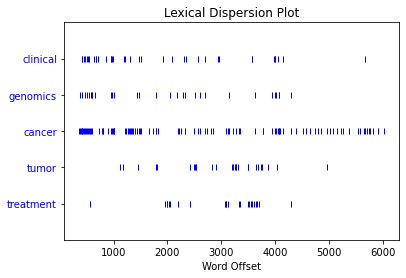

In [11]:
#Dispersion_plot
text_String2.dispersion_plot(['clinical', 'genomics', 'cancer', 'tumor','treatment'])

## - Frequency Distribution

In [12]:
import nltk
fdist1 = nltk.FreqDist(text_String2)

In [13]:
print(fdist1)

<FreqDist with 1757 samples and 6242 outcomes>


In [14]:
fdist1.most_common(50)

[(',', 382),
 ('.', 347),
 ('of', 179),
 ('-', 166),
 ('the', 156),
 ('and', 104),
 (':', 98),
 ('cancer', 98),
 ('to', 69),
 ('in', 63),
 ('for', 60),
 ('a', 57),
 ('with', 49),
 ('is', 44),
 (';', 41),
 ('[', 38),
 ('clinical', 37),
 ('PMID', 35),
 ('–', 34),
 ('lung', 33),
 ('genomics', 30),
 ('et', 29),
 ('al', 29),
 ('].', 28),
 ('The', 27),
 ('tumor', 27),
 ('J', 27),
 ('be', 25),
 ('2013', 24),
 ('from', 24),
 ('this', 23),
 ('treatment', 23),
 ('(', 21),
 ('are', 21),
 ('that', 21),
 ('was', 21),
 ('Cancer', 19),
 ('sequencing', 19),
 ('or', 19),
 ('he', 19),
 ('/', 18),
 ('as', 18),
 ('have', 18),
 ('patients', 17),
 ('not', 17),
 ('we', 17),
 ('patient', 17),
 ('4', 16),
 ('non', 16),
 ('He', 16)]

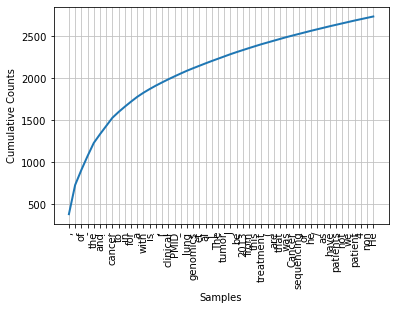

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [15]:
fdist1.plot(50,cumulative = True)

- These 50 words account for nearly half of the journal  
(Application of Cancer Genomics to Solve Unmet Clinical Needs, file500's text) as <FreqDist with 1757 samples and 6242 outcomes>

In [16]:
fdist1.hapaxes()

['Home',
 'Sitemap',
 'Us',
 'HOME',
 'CLOSE',
 'Volume',
 ');',
 '&',
 'Informatics',
 '):',
 '179',
 'Published',
 'online',
 'December',
 'https',
 'doi',
 '5808',
 'GI',
 'Se',
 'Sung',
 'Ji',
 'Yeon',
 'SooJin',
 'Ahnah',
 '1Department',
 'Internal',
 'Hospital',
 '2Cancer',
 'Institute',
 'Corresponding',
 'author',
 '2072',
 '0832',
 '764',
 '2199',
 'sehoon',
 'lee119',
 'gmail',
 'Received',
 '05',
 'Revised',
 'Accepted',
 'open',
 'access',
 '/):',
 'identical',
 'Creative',
 'Commons',
 'Attribution',
 'Non',
 'Commercial',
 'License',
 '/).',
 'Abstract',
 'contributed',
 'our',
 'understanding',
 'Indeed',
 'strong',
 'analyzing',
 'factorial',
 'complicated',
 'pre',
 'clinician',
 'bring',
 'together',
 'solving',
 'review',
 'present',
 'solve',
 'Keywords',
 'therapy',
 'health',
 'services',
 'demand',
 'Introduction',
 'explosive',
 'offers',
 'big',
 'main',
 'delay',
 'connectivity',
 'Clinicians',
 'confident',
 'much',
 'given',
 'conventional',
 'what',
 'prior

### Eliminating frequent short words & infrequent long words to find words that characterize a text

let's find words which are longer than seven letters and occur more that seven times.

In [18]:
sorted(w for w in set(text_String2) if len(w)>7 and fdist1[w]>7)

['Application',
 'Genomics',
 'adjuvant',
 'application',
 'approach',
 'chemotherapy',
 'circulating',
 'cisplatin',
 'clinical',
 'clinicians',
 'detection',
 'diagnosis',
 'genomics',
 'germline',
 'important',
 'patients',
 'population',
 'screening',
 'sequencing',
 'treatment']

## - Collocations

In [20]:
text_String2.collocations() #words that unusually often occur together

lung cancer; cancer genomics; clinical needs; early detection; cell
lung; Cancer Genomics; adjuvant treatment; http ://; Clin Oncol;
circulating tumor; unmet clinical; generation sequencing; Genomics
Inform; Solve Unmet; clinical field; adjuvant chemotherapy; controlled
trial; targeted agents; Clinical Needs; tumor DNA


## - Conditional Frequency Distribution 

### 1) 10개의 파일에 대한 cfd Graph 생성

In [58]:
#file수 10개로 조정 (너무 많기 때문)
cfd = nltk.ConditionalFreqDist((target, fileid[4:7])
                              for target in ['genotype', 'growth', 'protein', 'system', 'disease']
                              for fileid in GNICorpus.fileids()[:10]
                              for w in GNICorpus.words(fileid)
                              if w.lower().startswith(target))

In [59]:
cfd.tabulate()

         100 101 102 103 104 105 106 107 108 109 
 disease  19   7   5   0  42  14   9  12  25   2 
genotype   2  10   0   0   1  10   1   2   5   9 
  growth   0   0  28   2   0   0   1   8   0  18 
 protein   0   0  40   4   5   8  12  29   7   1 
  system   1   2   5   1   4   1   2   3   2   0 


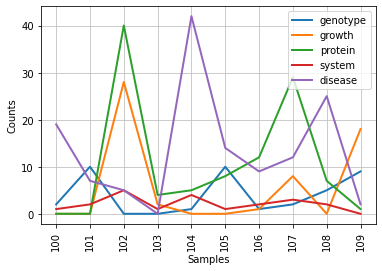

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [60]:
cfd.plot()

### 2) 연도별 cfd Graph 생성 (2013 ~ 2022)

연도별 파일 묶음 만들기

In [27]:
for i in range(2013, 2023):
    filename = "gni_{0}.txt".format(i) #연도별 txt파일 생성 ex. gni_2014.txt
    f = open(filename, 'w', encoding='UTF-8')
    f.close()

In [28]:
from nltk.corpus import PlaintextCorpusReader
year_corpus_root = 'C:/Users/diana/year_corpora'
GNI_year_corpus = PlaintextCorpusReader(year_corpus_root, '.*')

In [29]:
import re

연도별 파일 내부에 동일 연도의 텍스트 써넣기

In [30]:
for fileid in GNICorpus.fileids():
    raw = GNICorpus.raw(fileid)
    lst = re.findall(r'Received [a-zA-Z]+ [0-9]+, [0-9]+', raw)
    str = ''.join(lst)
    str = str[-4:]
    f = open("gni_"+str+".txt", 'w', encoding='UTF-8')
    f.write(raw)
    f.close()

In [31]:
import nltk

In [55]:
cfd2 = nltk.ConditionalFreqDist((target, y_fileid[4:8])
                              for target in ['amino', 'New', 'blood', 'system', 'disease']
                              for y_fileid in GNI_year_corpus.fileids()
                                if len(y_fileid) == 12
                              for w in GNI_year_corpus.words(y_fileid)
                              if w.lower().startswith(target))

In [56]:
cfd2.tabulate()

        2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 
  amino    1    2    5    9    0    0    0    0    0   25    0 
  blood    0    1    0    0   20    3    0    0    0    0    1 
disease    0    4    0    1    4    0    0    0    4    3    1 
 system    3    2    3    1    0    0    1    2    2    2    8 


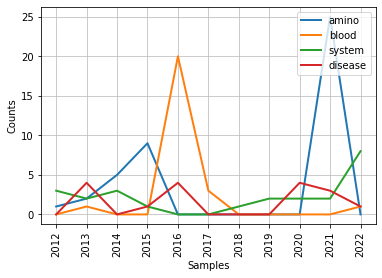

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
cfd2.plot()

In [9]:
import nltk

In [10]:
for i in range(500,550):
    fileid = "file{0}.txt".format(i)
    print(fileid)
    print()
    raw = GNICorpus.raw(fileid)
    tokens = nltk.word_tokenize(raw) #nltk 라이브러리를 이용해 raw -> words로 split
    
    print(" tokens ")
    print(tokens[:50]) #너무 많으니 50개만 가져오기로 하자.
    print()
    
    text = nltk.Text(tokens) 
    print(" concordance of 'protein' ")
    print(text.concordance('protein'))#show every occurrence of a given word, together with some context
    print()
    
    print(" collocation_list ")
    print(text.collocation_list()) #expressions of multiple words which commonly co-occur
    print("----------------------------------------------------------------------------------------------------")

file500.txt

 tokens 
['Prediction', 'of', 'Metal', 'Ion', 'Binding', 'Sites', 'in', 'Proteins', 'from', 'Amino', 'Acid', 'Sequences', 'by', 'Using', 'Simplified', 'Amino', 'Acid', 'Alphabets', 'and', 'Random', 'Forest', 'Model', 'Home', 'E-Submission', 'Sitemap', 'Contact', 'Us', 'HOME', 'ABOUT', 'Aims', 'and', 'Scope', 'Journal', 'catalog', 'Editorial', 'Board', 'Best', 'Practice', 'Open', 'Access', 'Policy', 'Contact', 'us', 'ARTICLE', 'CATEGORY', 'Original', 'Article', 'Review', 'Article', 'Editorial']

 concordance of 'protein' 
Displaying 25 of 48 matches:
 important for the stability of the protein and also serve as co-factors in var
so help in obtaining the functional protein . Computational prediction using ma
ntral role in the building block of protein . The primary structure of the prot
tein . The primary structure of the protein is determined by the arrangement of
ing amino acids . The function of a protein is determined from their amino acid
ocesses and in the stability of

[('olfactory', 'receptor'), ('β-gal', 'staining'), ('Biochem', 'Biophys'), ('olfactory', 'receptors'), ('chain', 'reaction'), ('Sci', 'Rep'), ('prostate', 'cancer'), ('Olfactory', 'Receptors'), ('Olfactory', 'receptor'), ('sciatic', 'nerve'), ('cognate', 'ligand'), ('Res', 'Commun'), ('System-Wide', 'Expression'), ('Genomics', 'Inform'), ('cerebral', 'cortex'), ('Natl', 'Acad'), ('PLoS', 'One'), ('Proc', 'Natl'), ('coronary', 'artery'), ('dorsal', 'root')]
----------------------------------------------------------------------------------------------------
file505.txt

 tokens 
['Accuracy', 'of', 'Imputation', 'of', 'Microsatellite', 'Markers', 'from', 'BovineSNP50', 'and', 'BovineHD', 'BeadChip', 'in', 'Hanwoo', 'Population', 'of', 'Korea', 'Home', 'E-Submission', 'Sitemap', 'Contact', 'Us', 'HOME', 'ABOUT', 'Aims', 'and', 'Scope', 'Journal', 'catalog', 'Editorial', 'Board', 'Best', 'Practice', 'Open', 'Access', 'Policy', 'Contact', 'us', 'ARTICLE', 'CATEGORY', 'Original', 'Article', '

 tokens 
['Editor', '’', 's', 'Introduction', 'to', 'This', 'Issue', '(', 'G', '&', 'I', '16:3', ',', '2018', ')', 'Home', 'E-Submission', 'Sitemap', 'Contact', 'Us', 'HOME', 'ABOUT', 'Aims', 'and', 'Scope', 'Journal', 'catalog', 'Editorial', 'Board', 'Best', 'Practice', 'Open', 'Access', 'Policy', 'Contact', 'us', 'ARTICLE', 'CATEGORY', 'Original', 'Article', 'Review', 'Article', 'Editorial', 'Application', 'Note', 'Brief', 'Communication', 'Clinical', 'Genomics', 'Genomic']

 concordance of 'protein' 
no matches
None

 collocation_list 
[('prostate', 'cancer'), ('Genomics', 'Inform'), ('Inform', 'Search'), ('castration-resistant', 'prostate'), ('ARTICLE', 'CATEGORY'), ('ARTICLES', 'New'), ('Access', 'Policy'), ('Application', 'Note'), ('Article-processing', 'Charge'), ('Authors', 'Guideline'), ('BROWSE', 'ARTICLES'), ('Best', 'Practice'), ('Board', 'Best'), ('CATEGORY', 'Original'), ('CONTRIBUTORS', 'Instructions'), ('Cited', 'Funded'), ('Funded', 'Articles'), ('Genome', 'Organizatio

 tokens 
['Generation', 'of', 'Whole-Genome', 'Sequencing', 'Data', 'for', 'Comparing', 'Primary', 'and', 'Castration-Resistant', 'Prostate', 'Cancer', 'Home', 'E-Submission', 'Sitemap', 'Contact', 'Us', 'HOME', 'ABOUT', 'Aims', 'and', 'Scope', 'Journal', 'catalog', 'Editorial', 'Board', 'Best', 'Practice', 'Open', 'Access', 'Policy', 'Contact', 'us', 'ARTICLE', 'CATEGORY', 'Original', 'Article', 'Review', 'Article', 'Editorial', 'Application', 'Note', 'Brief', 'Communication', 'Clinical', 'Genomics', 'Genomic', 'archive', 'Research', 'Communication']

 concordance of 'protein' 
no matches
None

 collocation_list 
[('prostate', 'cancer'), ('castration-resistant', 'prostate'), ('Chungbuk', 'National'), ('Whole-Genome', 'Sequencing'), ('four', 'pairs'), ('National', 'University'), ('molecular', 'characteristics'), ('Genomics', 'Inform'), ('Sequencing', 'Data'), ('Comparing', 'Primary'), ('Prostate', 'Cancer'), ('Castration-Resistant', 'Prostate'), ('androgen', 'deprivation'), ('metastati

[('conserved', 'domains'), ('Acids', 'Res'), ('Nucleic', 'Acids'), ('International', 'Committee'), ('specific', 'protein'), ('RNA', 'helicase'), ('coding', 'region'), ('Genomics', 'Inform'), ('Taxon-Specific', 'Genes'), ('Viral', 'Taxon-Specific'), ('protein', 'sequences'), ('tertiary', 'structure'), ('RNA', 'helicases'), ('Original', 'Article'), ('complete', 'genome'), ('Calicivirus', 'coat'), ('Inform', 'Search'), ('GenBank', 'files'), ('conserved', 'domain'), ('high', 'similarity')]
----------------------------------------------------------------------------------------------------
file525.txt

 tokens 
['Genome-Based', 'Virus', 'Taxonomy', 'with', 'the', 'ICTV', 'Database', 'Extension', 'Home', 'E-Submission', 'Sitemap', 'Contact', 'Us', 'HOME', 'ABOUT', 'Aims', 'and', 'Scope', 'Journal', 'catalog', 'Editorial', 'Board', 'Best', 'Practice', 'Open', 'Access', 'Policy', 'Contact', 'us', 'ARTICLE', 'CATEGORY', 'Original', 'Article', 'Review', 'Article', 'Editorial', 'Application', 'No

 tokens 
['Multi-block', 'Analysis', 'of', 'Genomic', 'Data', 'Using', 'Generalized', 'Canonical', 'Correlation', 'Analysis', 'Home', 'E-Submission', 'Sitemap', 'Contact', 'Us', 'HOME', 'ABOUT', 'Aims', 'and', 'Scope', 'Journal', 'catalog', 'Editorial', 'Board', 'Best', 'Practice', 'Open', 'Access', 'Policy', 'Contact', 'us', 'ARTICLE', 'CATEGORY', 'Original', 'Article', 'Review', 'Article', 'Editorial', 'Application', 'Note', 'Brief', 'Communication', 'Clinical', 'Genomics', 'Genomic', 'archive', 'Research', 'Communication', 'Opinion', 'Others']

 concordance of 'protein' 
no matches
None

 collocation_list 
[('generalized', 'canonical'), ('canonical', 'correlation'), ('waist-hip', 'ratio'), ('canonical', 'variables'), ('subscapular', 'skinfold'), ('canonical', 'variable'), ('SNP', 'variables'), ('single', 'nucleotide'), ('correlation', 'analysis'), ('nucleotide', 'polymorphism'), ('first', 'canonical'), ('logistic', 'regression'), ('phenotype', 'block'), ('second', 'canonical'), ('Ge

[('quality', 'control'), ('Genomics', 'Inform'), ('control', 'measures'), ('Application', 'Note'), ('High-Performance', 'Pathway-Based'), ('Large-Scale', 'Genetic'), ('National', 'University'), ('Workbench', 'Increases'), ('PHARAOH', 'program'), ('WISARD', 'framework'), ('Analysis', 'Method'), ('Analysis', 'Workbench'), ('Genetic', 'Analysis'), ('Pathway-Based', 'Analysis'), ('Inform', 'Search'), ('Seoul', 'National'), ('association', 'studies'), ('PHARAOH', 'method'), ('ARTICLE', 'CATEGORY'), ('ARTICLES', 'New')]
----------------------------------------------------------------------------------------------------
file542.txt

 tokens 
['Opinion', ':', 'Strategy', 'of', 'Semi-Automatically', 'Annotating', 'a', 'Full-Text', 'Corpus', 'of', 'Genomics', '&', 'Informatics', 'Home', 'E-Submission', 'Sitemap', 'Contact', 'Us', 'HOME', 'ABOUT', 'Aims', 'and', 'Scope', 'Journal', 'catalog', 'Editorial', 'Board', 'Best', 'Practice', 'Open', 'Access', 'Policy', 'Contact', 'us', 'ARTICLE', 'CATEGO

https://www.educative.io/answers/what-is-wordtokenize-in-python  
https://www.nltk.org/howto/concordance.html  
https://www.nltk.org/howto/collocations.html

# 4. 다양한 예외처리 하기

## case 1)

In [12]:
from urllib import request
from bs4 import BeautifulSoup

In [13]:
for i in range(400,700):
    try:
        url = "https://genominfo.org/journal/view.php?number={0}".format(i)
        print("https://genominfo.org/journal/view.php?number={0}".format(i)) 
        response = request.urlopen(url)
        raw = response.read().decode('utf8')
        raw = BeautifulSoup(raw, 'html.parser').get_text()
    except UnicodeDecodeError: #예외가 발생했을때 실행됨.
        print("cannot process https://genominfo.org/journal/view.php?number={0}".format(i))


https://genominfo.org/journal/view.php?number=400
https://genominfo.org/journal/view.php?number=401
https://genominfo.org/journal/view.php?number=402
https://genominfo.org/journal/view.php?number=403
https://genominfo.org/journal/view.php?number=404
https://genominfo.org/journal/view.php?number=405
https://genominfo.org/journal/view.php?number=406
https://genominfo.org/journal/view.php?number=407
https://genominfo.org/journal/view.php?number=408
https://genominfo.org/journal/view.php?number=409
https://genominfo.org/journal/view.php?number=410
https://genominfo.org/journal/view.php?number=411
https://genominfo.org/journal/view.php?number=412
https://genominfo.org/journal/view.php?number=413
https://genominfo.org/journal/view.php?number=414
https://genominfo.org/journal/view.php?number=415
https://genominfo.org/journal/view.php?number=416
https://genominfo.org/journal/view.php?number=417
https://genominfo.org/journal/view.php?number=418
https://genominfo.org/journal/view.php?number=419


https://genominfo.org/journal/view.php?number=564
https://genominfo.org/journal/view.php?number=565
https://genominfo.org/journal/view.php?number=566
https://genominfo.org/journal/view.php?number=567
https://genominfo.org/journal/view.php?number=568
https://genominfo.org/journal/view.php?number=569
https://genominfo.org/journal/view.php?number=570
https://genominfo.org/journal/view.php?number=571
https://genominfo.org/journal/view.php?number=572
https://genominfo.org/journal/view.php?number=573
https://genominfo.org/journal/view.php?number=574
https://genominfo.org/journal/view.php?number=575
https://genominfo.org/journal/view.php?number=576
https://genominfo.org/journal/view.php?number=577
https://genominfo.org/journal/view.php?number=578
https://genominfo.org/journal/view.php?number=579
https://genominfo.org/journal/view.php?number=580
https://genominfo.org/journal/view.php?number=581
https://genominfo.org/journal/view.php?number=582
https://genominfo.org/journal/view.php?number=583


[오류해결 solution]  
try - except문을 활용해 예외를 처리해준다. 위 코드에서는 utf8으로 decode할 수 없는
경우에 에러가 발생할 수 있기 때문에, UnicodeDecodeError를 except case로 넣어주면 된다.

UnicodeDecodeError: 'utf-16-le' codec can't decode byte 0x0a in position 145906: truncated data  


## case 2)

In [6]:
try:
    ch = input('나눌 숫자를 입력하세요: ')
    x = int(ch)
    y = 10 / x
    print(y)
except ZeroDivisionError:   #예외가 발생했을때 실행됨
    print('예외가 발생했습니다.(ZeroDivisionError)')
    print('0으로 못 나눕니다')

except ValueError:
    print('예외가 발생했습니다.(ValueError)')
    print('숫자를 입력하세요')

나눌 숫자를 입력하세요: !
예외가 발생했습니다.(ValueError)
숫자를 입력하세요


[해석]  
(문제1)  
10을 x로 나누는 상황이므로 x에 0을 대입하게되면 에러 발생  
∴ZeroDivisionError의 경우를 except로 처리한다.  
(문제2)  
숫자가 아닌 문자(들)를 대입할 경우에 오류가 발생한다.  
∴ValueError에 해당하므로 문제1처럼 except case로 처리해줘야한다.

ZeroDivisionError: division by zero  
ValueError: invalid literal for int() with base 10: 'a'  

# 5. Genomics & Informatics Corpus 구축하기

In [7]:
import nltk
import re

In [8]:
from nltk.corpus import *

In [9]:
root_folder = "C:/my_gi_corpora"

In [10]:
myCorpus = PlaintextCorpusReader(root_folder, ".*\.txt", encoding="utf-8")

In [11]:
raw = myCorpus.raw()
len(raw)

11019275

In [12]:
raw[:1000]

"\r\n\r\n\r\n\r\n\r\n\r\nReflections on the US FDA's Warning on Direct-to-Consumer Genetic Testing\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nHome\r\nE-Submission\r\nSitemap\r\nContact Us\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nHOME\r\nABOUT\r\n\r\nAims and Scope\r\nJournal catalog\r\nEditorial Board\r\nBest Practice\r\nOpen Access Policy\r\nContact us\r\n\r\n\r\nARTICLE CATEGORY\xa0\r\n\r\n\r\n\r\nOriginal Article\r\nReview Article\r\nEditorial\r\nApplication Note\r\nBrief Communication\r\nClinical Genomics\r\nGenomic archive\r\nResearch Communication\r\nOpinion\r\nOthers\r\n\r\nBrowse all articles >\r\n\r\n\r\n\r\nBROWSE ARTICLES\xa0\r\n\r\n\r\n\r\nNew Issue\r\nAll Issues\r\nMost View\r\nMost Download\r\nMost Cited\r\nFunded 

정규식 표현을 이용하여 이메일 모두 찾기  

In [13]:
re.findall(r'[\w._%+=]+@[\w.-]+\.[a-zA-Z]{2,4}', raw)

['lyra@catholic.ac.kr',
 'yejun@catholic.ac.kr',
 'kogo3@kogo.or.kr',
 'sskimb@ssu.ac.kr',
 'kogo3@kogo.or.kr',
 'elusandy@gmail.com',
 'kogo3@kogo.or.kr',
 'sskimb@ssu.ac.kr',
 'kogo3@kogo.or.kr',
 'jungkyoon@kaist.ac.kr',
 'kogo3@kogo.or.kr',
 'zknightm@gmail.com',
 'kogo3@kogo.or.kr',
 'ssarda@umiacs.umd.edu',
 'Sridhar@umiacs.umd.edu',
 'kogo3@kogo.or.kr',
 'hyung@ewha.ac.kr',
 'kogo3@kogo.or.kr',
 'kasohn@ajou.ac.kr',
 'kogo3@kogo.or.kr',
 'lypark@yonsei.ac.kr',
 'kogo3@kogo.or.kr',
 'Q.Nguyen@uws.edu.au',
 'kogo3@kogo.or.kr',
 'kbj6181@cdc.go.kr',
 'kogo3@kogo.or.kr',
 'sejongoh@dankook.ac.kr',
 'kogo3@kogo.or.kr',
 'shkwak@snu.ac.kr',
 'kogo3@kogo.or.kr',
 'jsunha@yuhs.ac',
 'kogo3@kogo.or.kr',
 'sbcho@korea.kr',
 'kogo3@kogo.or.kr',
 'jongil@snu.ac.kr',
 'kogo3@kogo.or.kr',
 'heebal@snu.ac.kr',
 'kogo3@kogo.or.kr',
 'khs307@pusan.ac.kr',
 'kogo3@kogo.or.kr',
 'anayet_johny@yahoo.com',
 'kogo3@kogo.or.kr',
 'satishangral@gmail.com',
 'kogo3@kogo.or.kr',
 'snrbioinfo@gmail.com',


※ 첨부해주신 github 압축 파일에서 raw_text2_backup file을 찾을 수 없어서 G&I 사이트에서 가져온 텍스트 html에서 이메일 주소를 찾도록 코드를 짰습니다.